$$ Pupipat\ Singkhorn$$

# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



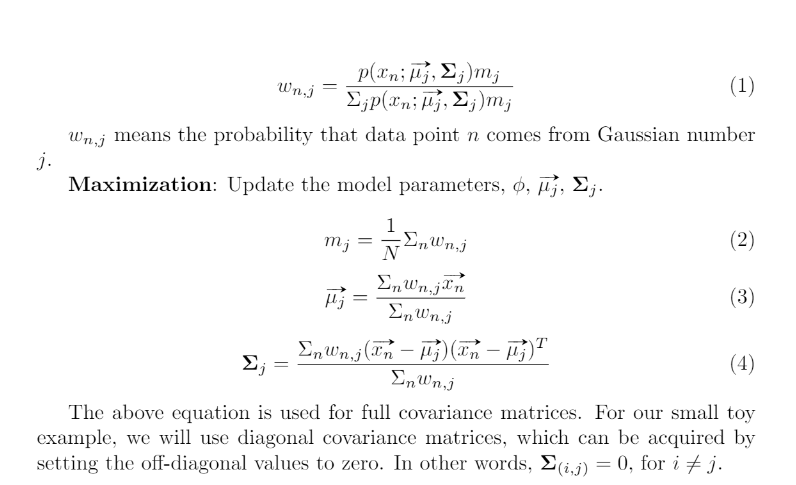

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0


    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        num_samples = data.shape[0]
        num_mixtures = len(self.mixture_weight)
        
        w = np.zeros((num_samples, num_mixtures))
        for n in range(num_samples):
            for j in range(num_mixtures):
                # mixture_weight * prob 
                w[n, j] = self.mixture_weight[j] * multivariate_normal.pdf(data[n], mean=self.mean_params[j], cov=self.cov_params[j])
            w[n] /= np.sum(w[n]) # /Sigma(prob * mixture_weight)

        return w # nparray: n rows, j columns


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        num_samples = data.shape[0]
        num_features = data.shape[1]
        num_mixtures = len(self.mixture_weight)
        
        for j in range(num_mixtures):
            # Update mixture weight
            self.mixture_weight[j] = np.mean(w[:,j])
            
            # Update mean
            self.mean_params[j] = np.sum(w[:,j].reshape(-1,1) * data, axis=0) / np.sum(w[:,j])
            
            # Update covariance
            cov_sum = np.zeros((num_features, num_features))
            for n in range(num_samples):
                diff = data[n] - self.mean_params[j]
                cov_sum += w[n, j] * np.outer(diff, diff)
            self.cov_params[j] = cov_sum / np.sum(w[:, j])
            
            # Convert to diagonal covariance matrix
            self.cov_params[j] = np.diag(np.diag(self.cov_params[j]))  # Set off-diagonal elements to zero


    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        num_samples = data.shape[0]
        num_mixtures = len(self.mixture_weight)
        
        log_likelihood = 0
        for n in range(num_samples):
            
            likelihood = 0
            for j in range(num_mixtures):
                likelihood += self.mixture_weight[j] * multivariate_normal.pdf(data[n], mean=self.mean_params[j], cov=self.cov_params[j])
            
            log_likelihood += np.log(likelihood) if likelihood!=0 else 1e-20
        
        return log_likelihood


    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")


    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):
            
            # TODO: Perform EM step.

            # INSERT CODE HERE

            # E-step
            w = self.estimation_step(data)

            # M-step
            self.maximization_step(data, w)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter+1}")
                self.print_iteration()

        return log_prob_list

In [3]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m # Initialize the mixture weights
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.45757241940119386, 0.20909424706571345, 0.33333333353309275]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.40711618315944753, 0.25954960846072456, 0.3333342083798279]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
--------------

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



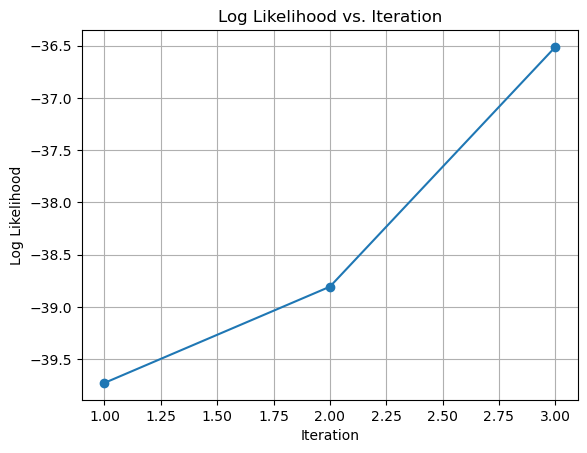

In [4]:
# TODO
def plot_log_likelihood(log_prob_list, num_iterations):
        """
        Plot log likelihood.
        """

        # Plot log likelihood vs. iteration number
        plt.figure()
        plt.plot(range(1, num_iterations + 1), log_prob_list, marker='o')
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood vs. Iteration')
        plt.grid(True)
        plt.show()

plot_log_likelihood(log_prob_list, num_iterations)

    ANS : Yes, but only up to 3 iterations. If the iteration count increases beyond that, it may not lead to further improvements.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.

In [5]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.6666666649702522, 0.3333333350297478]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.6666943621060054, 0.3333056378939946]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 3
m :
 [0.6666945259520648, 0.3333054740479351]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]



### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

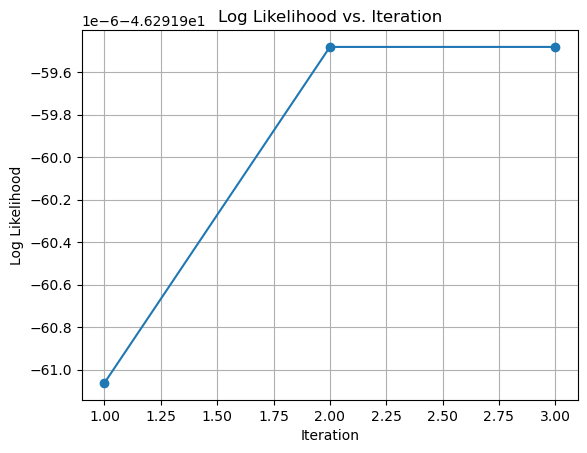

In [6]:
# TODO: Plot log_likelihood from T3
plot_log_likelihood(log_prob_list2, num_iterations)

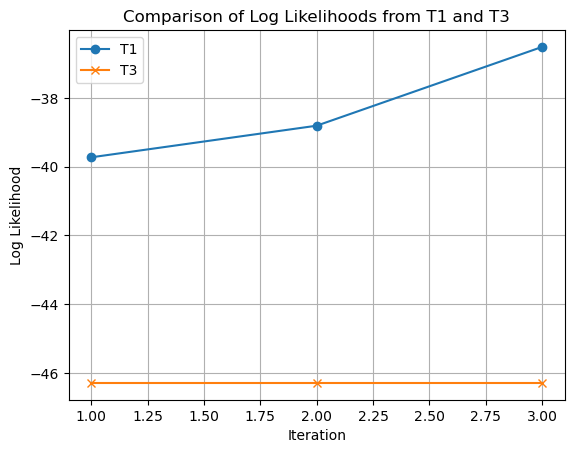

In [7]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
def plot_comp_log_likelihood(log_likelihoods1, log_likelihoods2, num_iterations):
        """
        Plot the comparison of log likelihoods from two sets of EM iterations.
        """
        plt.figure()
        plt.plot(range(1, num_iterations + 1), log_likelihoods1, marker='o', label='T1')
        plt.plot(range(1, num_iterations + 1), log_likelihoods2, marker='x', label='T3')
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Comparison of Log Likelihoods from T1 and T3')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_comp_log_likelihood(log_prob_list, log_prob_list2, num_iterations)

    ANS : 3 mixtures (from T1) because log-likelihoods from T1 is greater than T3.

### OT1. Using 2 mixtures, initialize your Gaussian with means (0,0) and (10000,10000). Explain what happens. From this case, explain how a proper initialization should be performed. What other tricks can be used to prevent this from happening?

In [8]:
# num_mixture = 2
# mixture_weight = [1] * num_mixture

# mean_params = np.array([[0,0], [10000,10000]], dtype = float)
# cov_params = np.array([np.eye(2)] * num_mixture)

# # INSERT CODE HERE
# gmm3 = GMM(mixture_weight, mean_params, cov_params)
# log_prob_list3 = gmm3.perform_em_iterations(data, num_iterations)

**Ans:**
Initializing the Gaussian Mixture Model (GMM) with means (0,0) and (10000,10000) can lead to numerical instability and convergence issues. This is because the initial means are *vastly different*, causing one component to dominate the other. During the E-step, samples closer to one mean will have much higher probabilities assigned to that component, effectively ignoring the other component.

A proper initialization should ensure that the means are initialized closer to their *true values* or at least *balanced* so that no single component dominates the others. One common technique is to use K-means clustering to initialize the means. This approach helps in finding initial means that are representative of the data distribution.

To prevent convergence issues, you can also introduce regularization to the covariance matrix to ensure it remains well-conditioned. Adding a *small value* to the diagonal of the covariance matrix can help prevent it from becoming singular. Additionally, limiting the maximum value of the covariance matrix can also help prevent extreme values.

# The face database

In [9]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [11]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

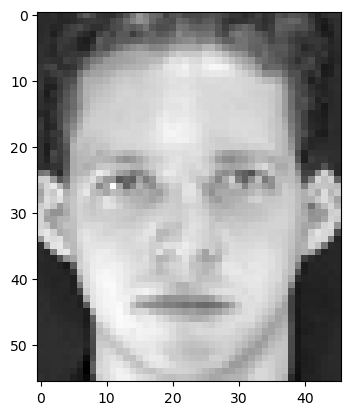

In [12]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [13]:
def L2_dist(image_1, image_2):
    """
    TODO: Calculate L2 distance.
    """
    # Reshape to 1D array
    image1_flat = np.reshape(image_1, -1)
    image2_flat = np.reshape(image_2, -1)
    
    return np.sqrt( np.sum( (image1_flat - image2_flat)**2 ) )

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


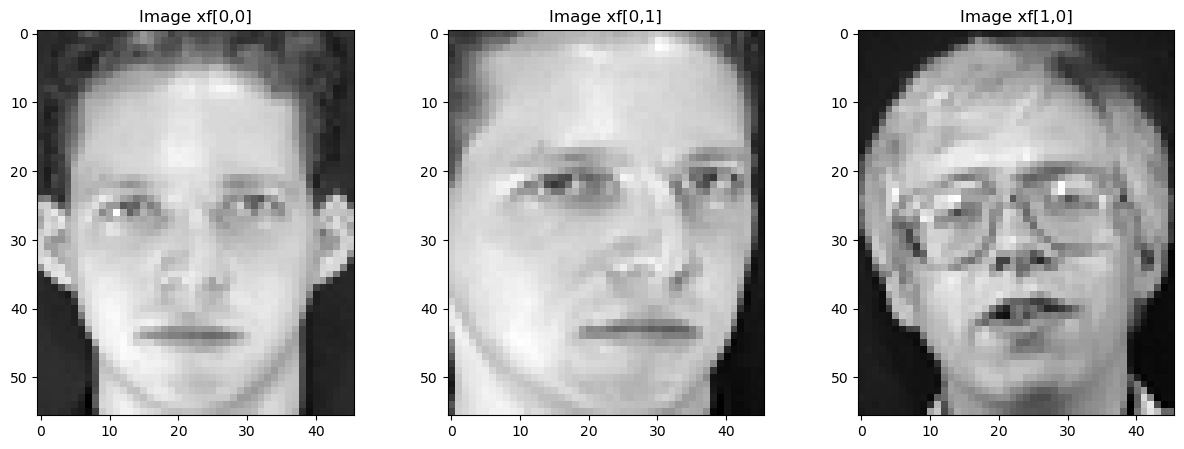

In [14]:
# TODO: Show why does the numbers make sense
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(xf[0, 0], cmap='gray')
axes[0].set_title('Image xf[0,0]')

axes[1].imshow(xf[0, 1], cmap='gray')
axes[1].set_title('Image xf[0,1]')

axes[2].imshow(xf[1, 0], cmap='gray')
axes[2].set_title('Image xf[1,0]')

plt.show()

    ANS : Makes sense, a lower Euclidean distance indicates a greater similarity between pictures.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [15]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    people_index, image_index, image_height, image_width = matrix.shape
    
    organized_matrix = np.reshape(matrix,
                                  (people_index * image_index, image_height * image_width))
    
    return organized_matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """
    """
    A,B : list(np.array) of images
    Returns:
        similarity_matrix: 2D array
    """
    # INSERT CODE HERE
    similarity_matrix = np.zeros((len(A), len(B)))
    for i, image_1 in enumerate(A):
        for j, image_2 in enumerate(B):
            similarity_matrix[i, j] = L2_dist(image_1, image_2)

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

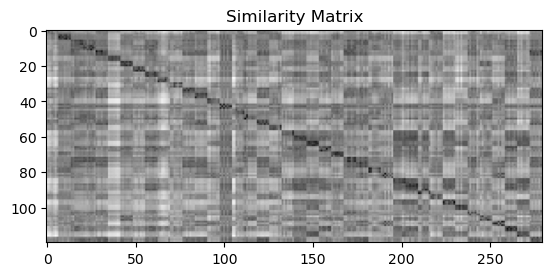

In [16]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
T, D = [], []
num_peoples, num_images, image_height, image_width = xf.shape
for i in range(num_peoples):
    for j in range(num_images):
        if j < 3:
            T.append(xf[i,j])
        else:
            D.append(xf[i,j])
T, D = np.array(T),np.array(D) # convert list to np.array

similarity_matrix = generate_similarity_matrix(T, D)

# Display similarity matrix as an image
plt.imshow(similarity_matrix, cmap='gray')
plt.title('Similarity Matrix')
plt.show()

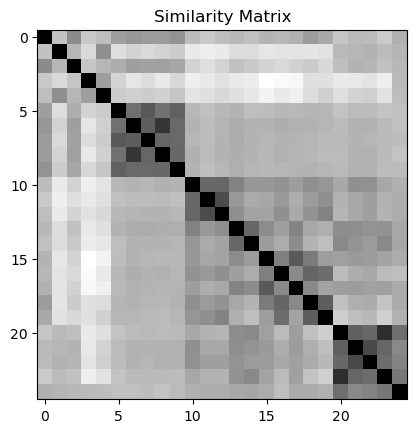

In [17]:
# Example similarity matrix
# calculated by the first 5 images from the first 5 people (for both T and D)

T_example, D_example = [], []
for i in range(5):
    for j in range(5):
            T_example.append(xf[i,j])
            D_example.append(xf[i,j])
T_example, D_example = np.array(T_example),np.array(D_example) # convert list to np.array

example_similarity_matrix = generate_similarity_matrix(T_example, T_example)

# Display similarity matrix as an image
plt.imshow(example_similarity_matrix, cmap='gray')
plt.title('Similarity Matrix')
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?

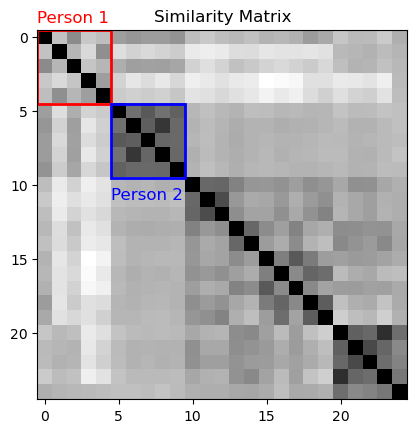

In [18]:
# INSERT CODE HERE
from matplotlib.patches import Rectangle

# Display the similarity matrix as an image
plt.imshow(example_similarity_matrix, cmap='gray')
plt.title('Similarity Matrix')

# Draw a red rectangle border for person 1
rect1 = Rectangle((-0.5, -0.5), 5, 5, edgecolor='red', facecolor='none', linewidth=2, fill=False)
plt.gca().add_patch(rect1)
plt.text(-0.5, -1, 'Person 1', color='red', fontsize=12)

# Draw a red rectangle border for person 2
rect2 = Rectangle((4.5, 4.5), 5, 5, edgecolor='blue', facecolor='none', linewidth=2, fill=False)
plt.gca().add_patch(rect2)
plt.text(4.5, 11, 'Person 2', color='blue', fontsize=12)

plt.show()

        ANS : Black indicates the percentage of similarity (100% being identical).
        For person 1: Each pose of person 1 is not very similar.
        For person 2: Each pose of person 2 is very similar.

## A simple face verification system

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [19]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    true_positve, true_negative, false_positive, false_negative = 0, 0, 0, 0
    num_testimgs = similarity_matrix.shape[1]
    
    for i in range(num_peoples):
        for j in range(num_testimgs):
            # compare against three training images idx: 3i to 3i+3
            min_distance = np.min(similarity_matrix[3*i : 3*i+3, j])
            if (j//7 == i): # test image comes from right person # Actual value is positive
                if min_distance < threshold: true_positve += 1
                else: false_negative += 1
            else: # Actual value is negative
                if min_distance < threshold: false_positive += 1
                else: true_negative += 1
    
    return true_positve, true_negative, false_positive, false_negative

In [20]:
# Quick check # for threshold = 9.5
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005) 

# INSERT CODE HERE

tp, tn, fp, fn = evaluate_performance(similarity_matrix, 10)

tpr = tp / (tp + fn)
far = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr)
print("False Alarm Rate (FAR):", far)

True Positive Rate (TPR): 0.9964285714285714
False Alarm Rate (FAR): 0.4564102564102564


        ANS: for threshold = 10
        True Positive Rate (TPR): 0.9964285714285714
        False Alarm Rate (FAR): 0.4564102564102564

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [21]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list = [], []
    
    for threshold in np.linspace(np.min(input_mat), np.max(input_mat), num=1000):
        tp, tn, fp, fn = evaluate_performance(input_mat, threshold)
        
        tpr = tp / (tp + fn)
        far = fp / (fp + tn)
        
        tpr_list.append(tpr)
        far_list.append(far)

    return tpr_list, far_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    
    tpr_list, far_list = calculate_roc(input_mat)
    
    plt.plot(far_list, tpr_list)
    plt.xlabel('False Alarm Rate (FAR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

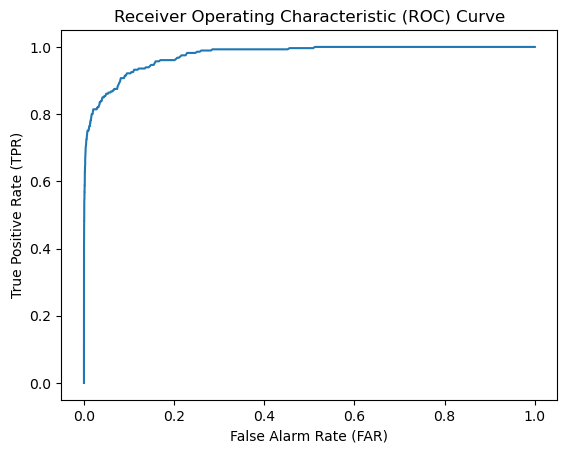

In [22]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS:
    minimum threshold:  minimum similarity score in similarity matrix.
    maximum threshold:  maximum similarity score in similarity matrix.

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



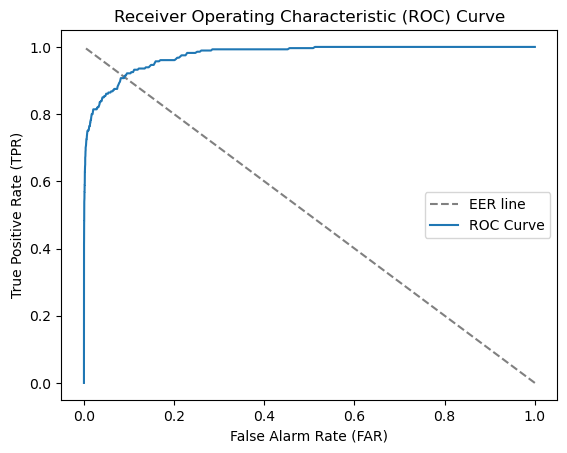

Equal Error Rate (EER): 0.9071428571428571
Recall rate at 0.1% FAR: 0.5428571428571428


In [23]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

def plot_roc(input_mat, eer=True, far_target=0, display=True):
    """
    Plot RoC Curve from a given matrix.
    """
    tpr_list, far_list = calculate_roc(input_mat)
    
    # Calculate recall rate at FAR
    if far_target:
        far_target_index = np.argmin(np.abs(np.array(far_list) - far_target))
        recall_at_far = tpr_list[far_target_index]
        
    # EER: x = 1-y, FAR = 1 - TPR
    if eer:
        miss_rate_list = 1 - np.array(tpr_list)
        eer_idx = np.argmin(np.abs(np.array(far_list) - miss_rate_list))
        eer_tpr = tpr_list[eer_idx]
        if display:
            plt.plot(miss_rate_list, tpr_list, color='gray', linestyle='dashed', label='EER line')
    
    # Plot ROC curve
    if display:
        plt.plot(far_list, tpr_list, label='ROC Curve')
        plt.xlabel('False Alarm Rate (FAR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    
    return eer_tpr, recall_at_far

# Plot ROC curve with EER and recall rate at 0.1% FAR
eer_tpr, recall_at_far = plot_roc(similarity_matrix, eer=True, far_target=0.001)
print("Equal Error Rate (EER):", eer_tpr)
print("Recall rate at 0.1% FAR:", recall_at_far)


## Principle Component Analysis (PCA)

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

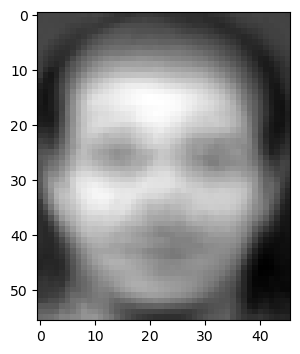

In [24]:
# INSERT CODE HERE
meanface = np.mean(T, axis=0)

plt.figure(figsize=(6, 4))
plt.imshow(meanface, cmap="gray")
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [25]:
# TODO: Find the size and the rank of the covariance matrix.
X_train = T.reshape(120,-1).T # shape: (2576, 120)
X_hat = X_train - meanface.reshape(-1,1)

covariance_matrix = np.cov(X_hat)

print("Size of Covariance matrix:", covariance_matrix.shape)
print("Rank of Covariance matrix:", np.linalg.matrix_rank(covariance_matrix))

Size of Covariance matrix: (2576, 2576)
Rank of Covariance matrix: 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non-zero eigenvalues do we expect to get?

In [26]:
# TODO: Compute gram matrix.
gram_matrix = np.dot(X_hat.T, X_hat) # G = X^T * X

# TODO: Show size and rank of Gram matrix.
print("Size of Gram matrix:", gram_matrix.shape)
print("Rank of Gram matrix:", np.linalg.matrix_rank(gram_matrix))
print("Non-zero eigenvalues:", (np.linalg.eigvals(gram_matrix) > 0.0).sum()) # positive-definite

Size of Gram matrix: (120, 120)
Rank of Gram matrix: 119
Non-zero eigenvalues: 119


## T14. Is the Gram matrix also symmetric? Why?


    ANS:

$$ A\ is\ symmetric \iff A\ =\ A^T $$

$$ G = \hat{X}^T \hat{X} $$
$$ G^T = (\hat{X}^T \hat{X})^T = \hat{X}^T (\hat{X}^T)^T = \hat{X}^T \hat{X} = G $$

$$ \therefore\ Gram\ matrix\ is\ symmetric $$

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.

In [27]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    
    # Calculate eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Treat very small values as zero
    eigenvalues[np.abs(eigenvalues) < 1e-20] = 0.0
    eigenvectors[np.abs(eigenvectors) < 1e-20] = 0.0

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

# Count non-zero eigenvalues # positive-definite
print("Number of non-zero eigenvalues:", np.sum(eigenvalues > 0.0))

Number of non-zero eigenvalues: 119


### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

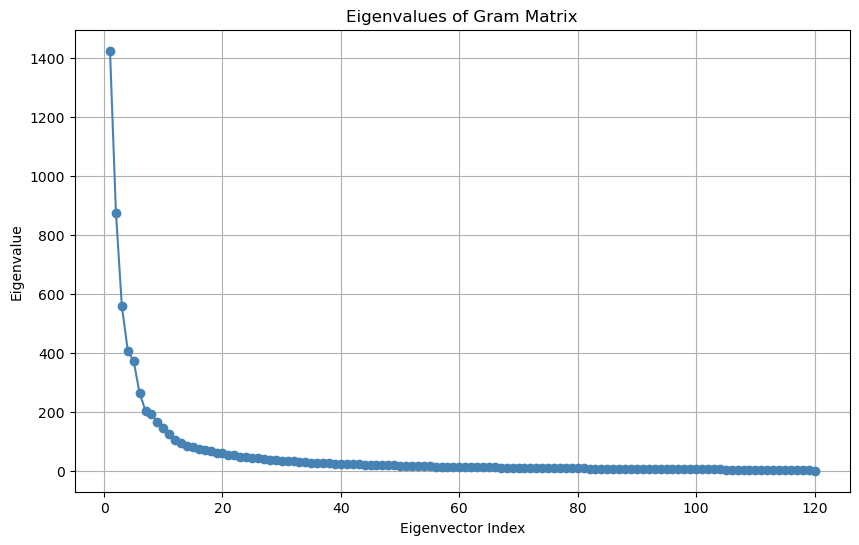

Number of eigenvectors to keep 95% of the variance: 64


In [28]:
# INSERT CODE HERE
def plot_eigenvalues(eigenvalues):
    """
    Plot the eigenvalues.

    Args:
    - eigenvalues (numpy.ndarray): Eigenvalues of the matrix.

    Returns:
    - None
    """

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='steelblue', linestyle='-')
    plt.xlabel('Eigenvector Index')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues of Gram Matrix')
    plt.grid(True)
    plt.show()

def find_num_eigenvectors_to_keep_variance(eigenvalues, variance_to_keep=0.95):
    """
    Find the number of eigenvectors to keep to retain a certain percentage of variance.

    Args:
    - eigenvalues (numpy.ndarray): Eigenvalues of the matrix.
    - variance_to_keep (float): Percentage of variance to keep.

    Returns:
    - num_eigenvectors (int): Number of eigenvectors to keep.
    """

    total_variance = np.sum(eigenvalues)
    variance_sum = 0
    for i, eigenvalue in enumerate(eigenvalues):
        variance_sum += eigenvalue
        if variance_sum / total_variance >= variance_to_keep:
            num_eigenvectors = i + 1
            break

    return num_eigenvectors

# Plot eigenvalues
plot_eigenvalues(eigenvalues)

# Find the number of eigenvectors to keep 95% of the variance
num_eigenvectors_to_keep = find_num_eigenvectors_to_keep_variance(eigenvalues, variance_to_keep=0.95)
print("Number of eigenvectors to keep 95% of the variance:", num_eigenvectors_to_keep)


    ANS: 64

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [29]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

def compute_and_renormalize_v(X_hat, eigenvectors):
    """
    Compute v and renormalize it so that the norm of each vector is 1.

    Parameters:
    - X_hat: Centered input matrix
    - eigenvectors: Eigenvectors of the Gram matrix

    Returns:
    - v: Renormalized eigenvectors
    """
    v = np.dot(X_hat, eigenvectors)
    v_norm = np.linalg.norm(v, axis=0)
    v = v / v_norm
    return v

# Compute and renormalize v
v = compute_and_renormalize_v(X_hat, eigenvectors)


In [30]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

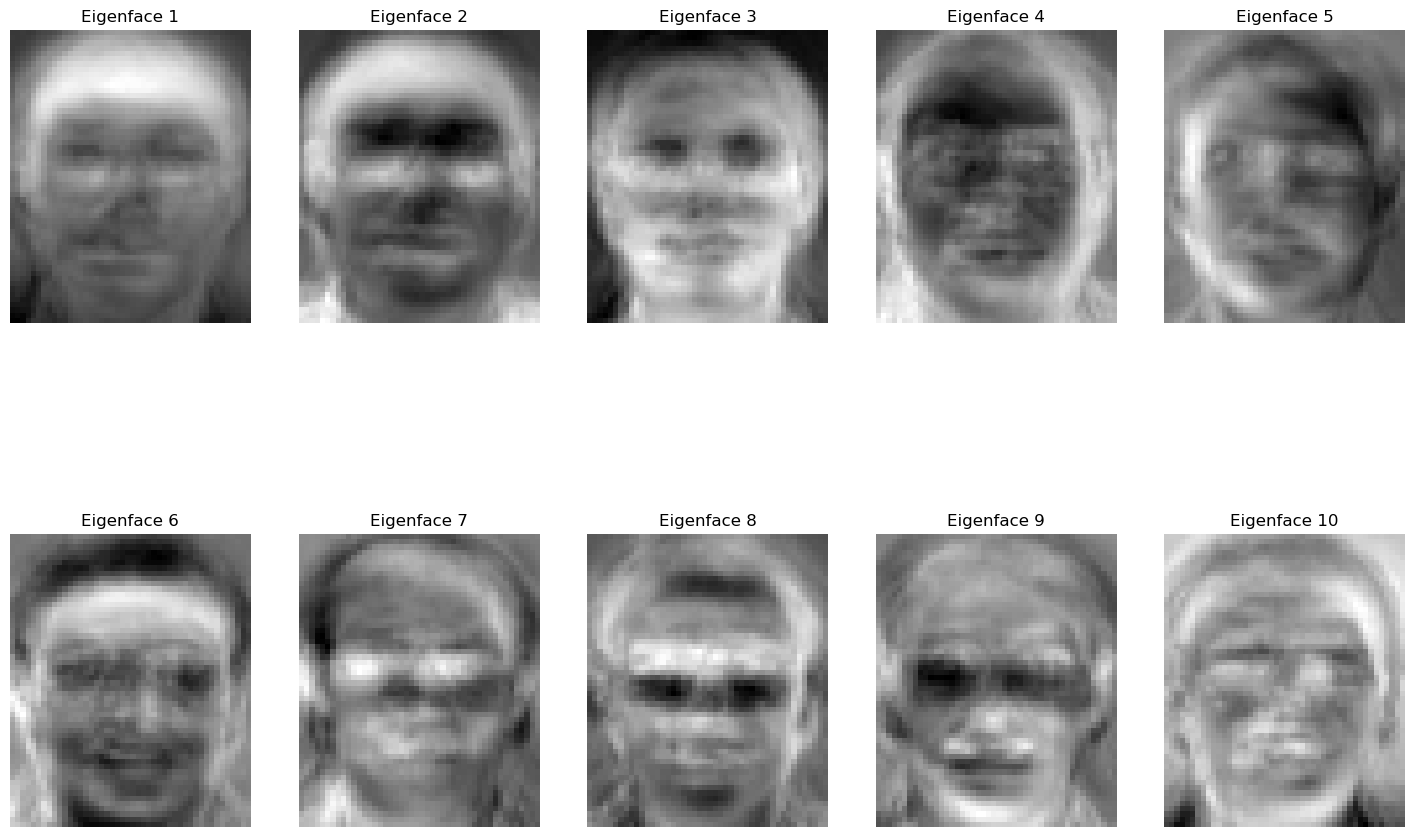

In [31]:
# TODO: Show the first 10 eigenvectors as images.

def show_eigenvectors_as_images(eigenvectors, num_images=10):
    """
    Show the first num_images eigenvectors as images.

    Parameters:
    - eigenvectors: Matrix of eigenvectors
    - num_images: Number of images to show (default is 10)
    """
    fig, axes = plt.subplots(2, num_images//2, figsize=(18, 12))
    for i in range(num_images):
        # Reshape the eigenvector to the original image shape (56x46)
        eigenvector_image = eigenvectors[i, :].reshape((56, 46))
        
        axes[i//5, i%5].imshow(eigenvector_image, cmap='gray')
        axes[i//5, i%5].axis('off')
        axes[i//5, i%5].set_title(f"Eigenface {i+1}")
    plt.show()

# Show the first 10 eigenvectors as images
show_eigenvectors_as_images(v.T, num_images=10)


### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS:
    The first eigenvector, which is white in the hair area, indicates that this eigenvector tells us that hair is the easiest thing to separate.
    The second eigenvector captures the hair, eyes, and mouth area.
    No, the biggest variance may be captured by eigenvectors that represent more complex combinations of features across different regions of the face

## PCA subspace and the face verification system

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [32]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    matrix.shape = (120,56,46)
    meanface.shape = (56,46)
    v.shape = (2576, 120)
    """
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """
    
    projection_vectors = []
    for i in range(matrix.shape[0]):
        diff = matrix[i] - meanface # (56, 46)
        projection_vectors.append( np.dot(v.T, diff.reshape(-1)) )

    return np.array(projection_vectors)

In [33]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:,:k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:,:k]

def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

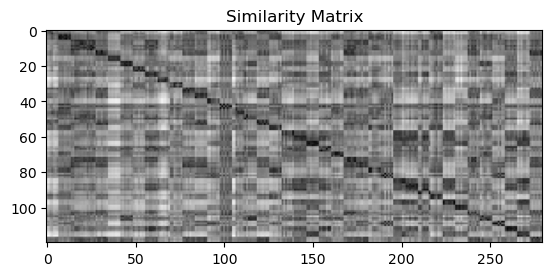

In [34]:
# TODO: Get similarity matrix of T_reduced and D_reduced
reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

# Display similarity matrix as an image
plt.imshow(reduced_similarity_matrix, cmap='gray')
plt.title('Similarity Matrix')
plt.show()

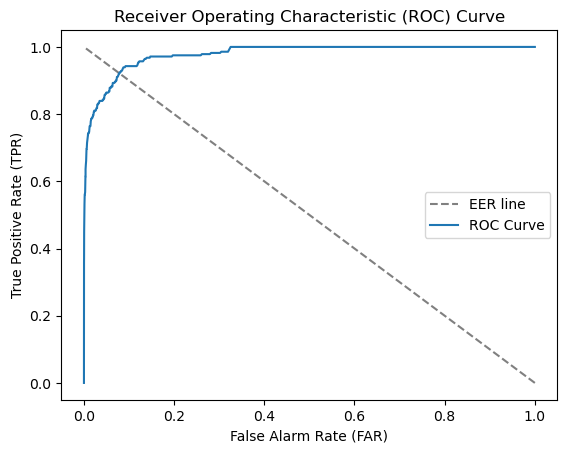

Equal Error Rate (EER): 0.9214285714285714
Recall rate at 0.1% FAR: 0.5178571428571429


In [35]:
# Plot ROC curve with EER and recall rate at 0.1% FAR
eer_tpr, recall_at_far = plot_roc(reduced_similarity_matrix, eer=True, far_target=0.001)
print("Equal Error Rate (EER):", eer_tpr)
print("Recall rate at 0.1% FAR:", recall_at_far)

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.

Best k value: 10
Best EER: 0.9214285714285714


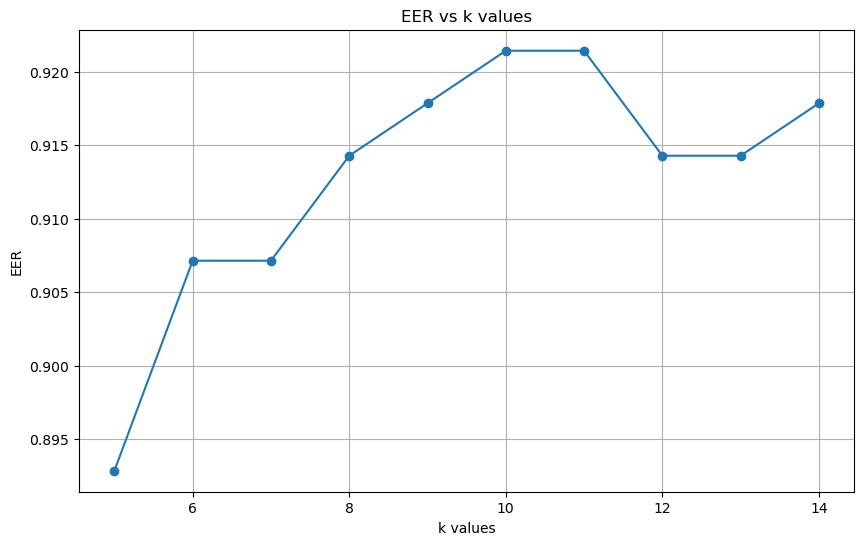

In [36]:
# INSERT CODE HERE
# List of k values to try
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Dictionary to store EER for each k
eer_dict = {}

# Iterate over each k value
for k in k_values:
    # Get projection vectors of T and D, then Keep first k projection values
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]

    # Calculate similarity matrix using reduced dimensions
    reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

    # Plot ROC curve with EER and recall rate at 0.1% FAR
    eer_tpr, _ = plot_roc(reduced_similarity_matrix, eer=True, far_target=0.001, display=False)

    # Store the EER for this k value
    eer_dict[k] = eer_tpr

# Find the k with the best EER
best_k = max(eer_dict, key=eer_dict.get)

print("Best k value:", best_k)
print("Best EER:", eer_dict[best_k])

# Plot the EER values for different k values
plt.figure(figsize=(10, 6))
plt.plot(list(eer_dict.keys()), list(eer_dict.values()), marker='o')
plt.xlabel('k values')
plt.ylabel('EER')
plt.title('EER vs k values')
plt.grid(True)
plt.show()

### OT2. Reconstruct the first image using this procedure. Use k = 10, what is the MSE?

In [37]:
k = 10
reconstructed_projection = calculate_projection_vectors(T[0:1], meanface, v)[:,:k] # (1, k)

reconstructed_image = meanface + np.dot(v[:,:k], reconstructed_projection.T).reshape(meanface.shape)

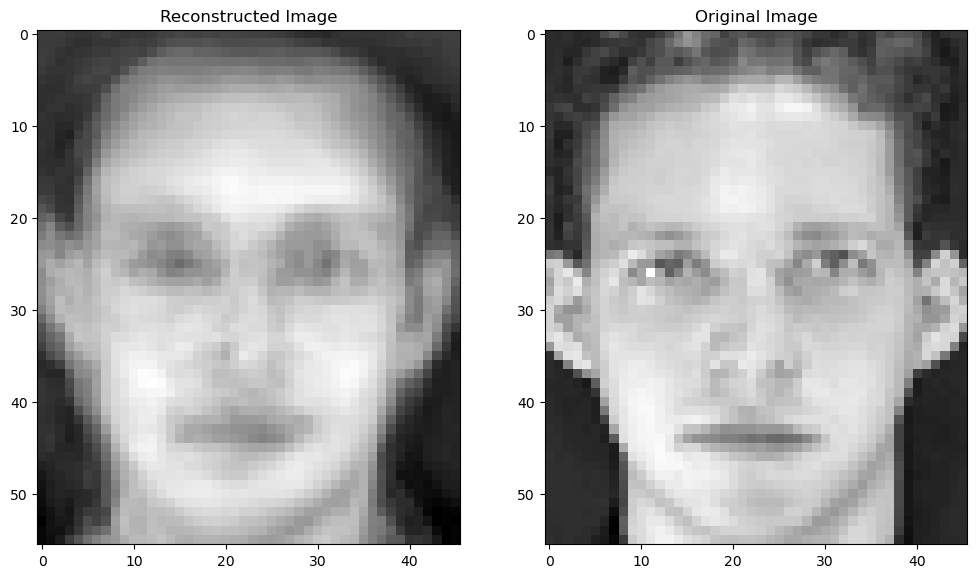

In [38]:
plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")

plt.subplot(1, 2, 2)
plt.imshow(xf[0][0], cmap="gray")
plt.title("Original Image")

plt.show()

In [39]:
def MSE(x_image, y_image):
    return np.mean( (x_image - y_image)**2 )

print("MSE:", MSE(reconstructed_image, xf[0][0]))

MSE: 0.006148335016488302


### OT3. For k values of 1,2,3,...,10,119, show the reconstructed images. Plot the MSE values.

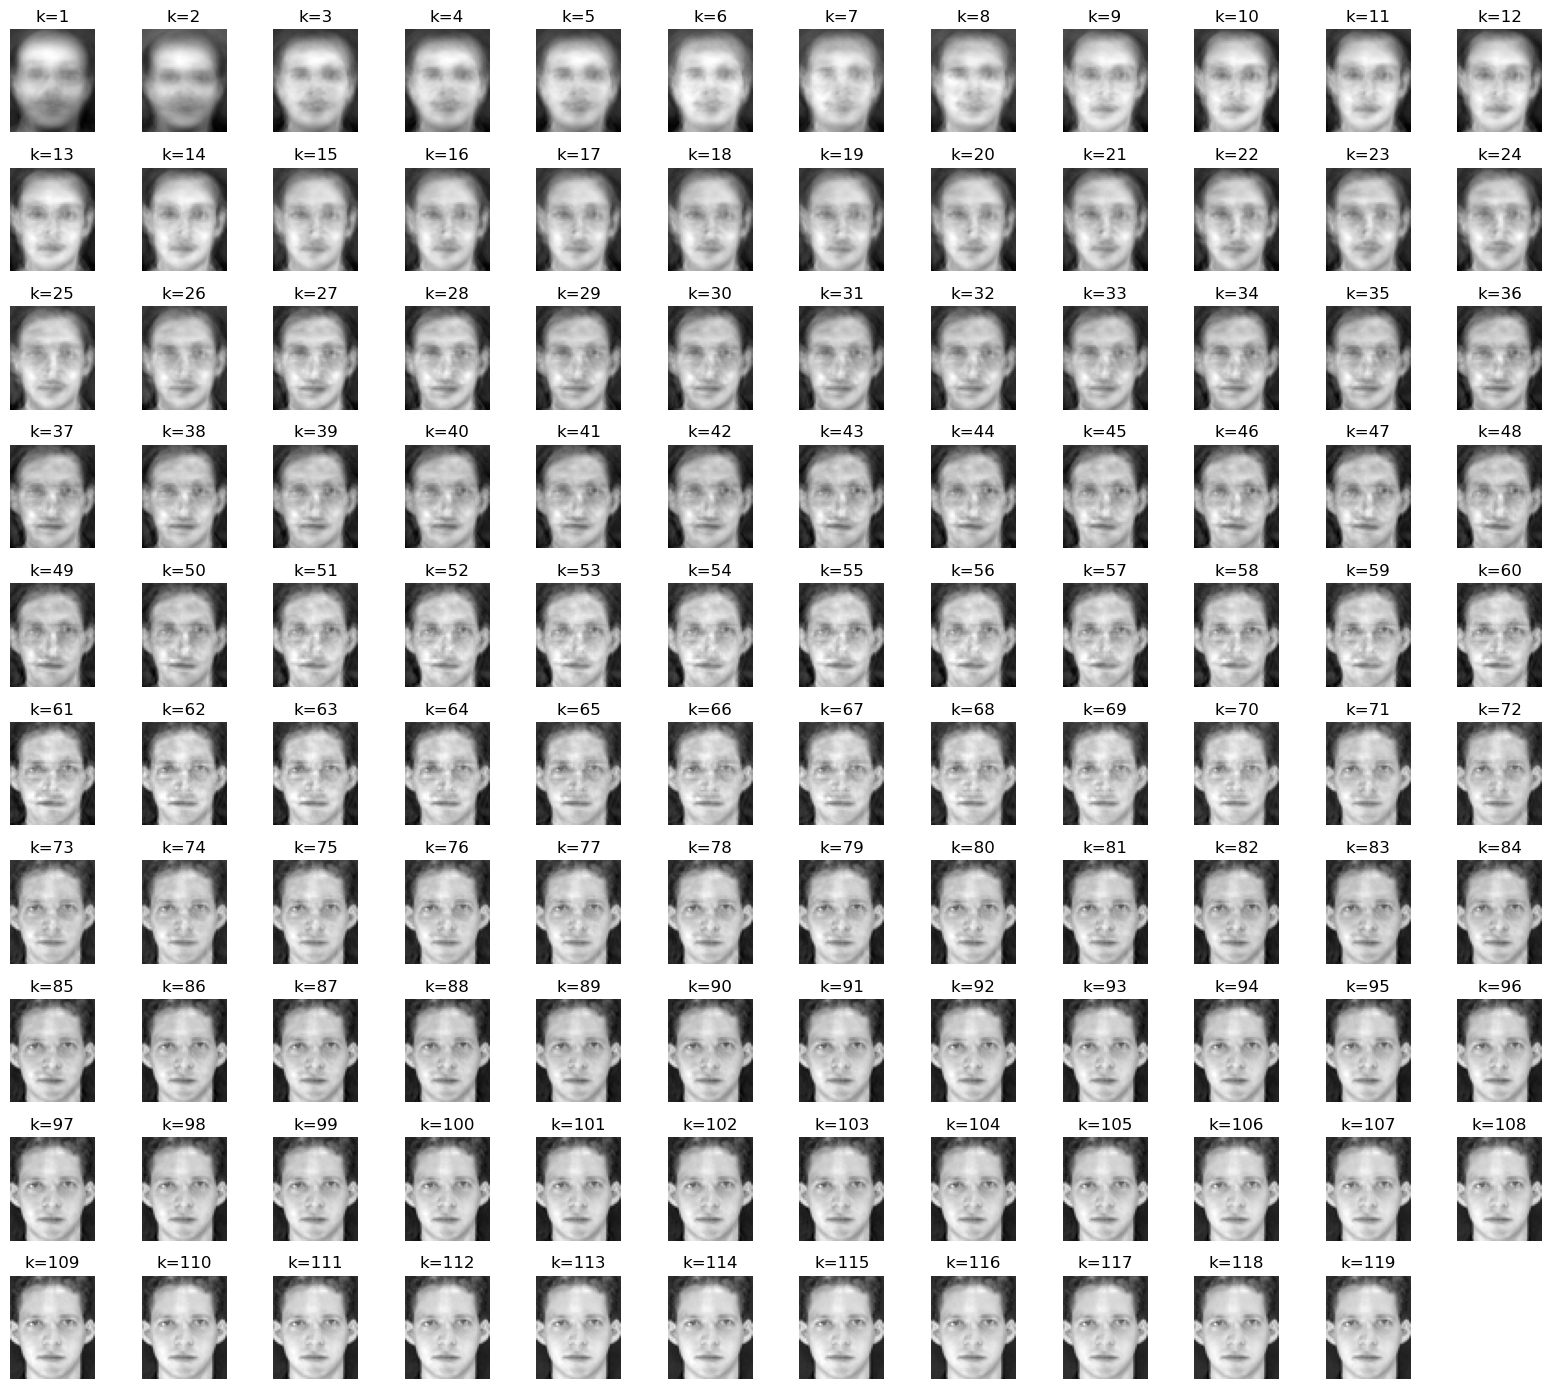

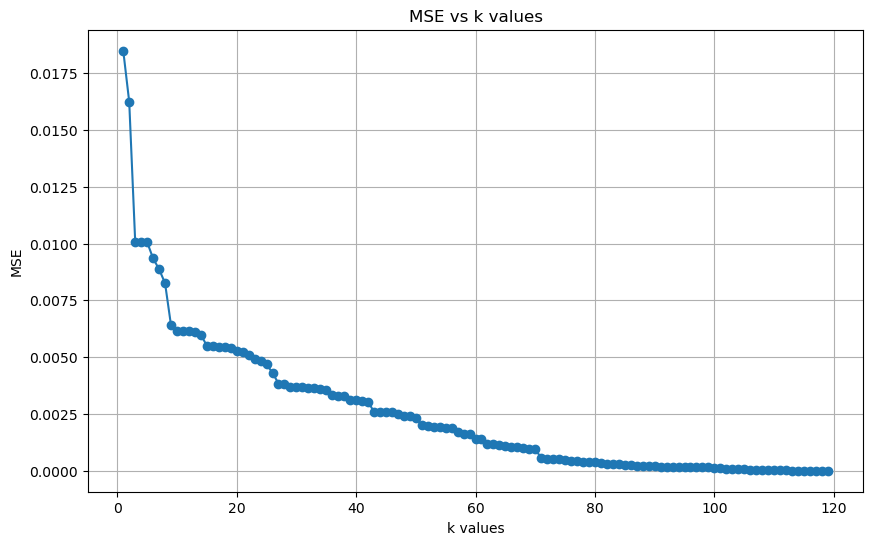

In [40]:
# List of k values
k_values = list(range(1, 120))

# Dictionary to store reconstructed images and their MSE
reconstructed_images = {}
mse_values = {}

# Iterate over each k value
for k in k_values:
    # Reconstruct the first image using k principal components
    reconstructed_projection = calculate_projection_vectors(T[0:1], meanface, v)[:,:k]
    reconstructed_image = meanface + np.dot(v[:,:k], reconstructed_projection.T).reshape(meanface.shape)
    
    # Compute MSE
    mse = MSE(reconstructed_image, xf[0][0])
    
    # Store reconstructed image and MSE
    reconstructed_images[k] = reconstructed_image
    mse_values[k] = mse

# Plot reconstructed images and MSE values
plt.figure(figsize=(16, 14))
for i, k in enumerate(k_values):
    plt.subplot(10, 12, i+1)
    plt.imshow(reconstructed_images[k], cmap='gray')
    plt.title(f"k={k}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot(list(mse_values.keys()), list(mse_values.values()), marker='o')
plt.xlabel('k values')
plt.ylabel('MSE')
plt.title('MSE vs k values')
plt.grid(True)
plt.show()


### OT4. Consider if we want to store 1,000,000 images of this type. How much space do we need? If we would like to compress the database by using the first 10 eigenvalues, how much space do we need? (Assume we keep the projection values, the eigenfaces, and the meanface as 32bit floats)

    ANS: 32 bit = 4 byte
    an image size = 56*46*4 = 10,304 Bytes ~ 10KB
    1M images use 10GB
    1 projection vector 10*4 = 40 Bytes, All(1M) = 40*1M = 40MB
    1 eigenface(image) = 10KB, All(10) = 100KB
    meanface(image) = 10KB
    
    total = 41MB

## Linear Discriminant Analysis (LDA)

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: 80

In [41]:
# TODO: Define dimension of PCA.
# 40 persons, 3 img/person
num_images = 120 # num training data
num_class = 40 # num class
Sw_rank = num_images - num_class # N - C
Sb_rank = num_class - 1 # C - 1

n_dim = Sw_rank

# TODO: Find PCA of T and D with n_dim dimension.
T_pca = calculate_projection_vectors(T, meanface, v)[:,:n_dim] # (120, 80)
D_pca = calculate_projection_vectors(D, meanface, v)[:,:n_dim] # (280, 80)

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [42]:
# Compute class means
mean_class = []
for class_idx in range(num_class):
    mean_class.append( T_pca[3*class_idx:3*class_idx+3].mean(axis=0) )
mean_class = np.array(mean_class).T  # (n_dim, num_class) # (80, 40)

mean_global = np.mean(mean_class, axis=1).reshape(-1, 1) # (80, 1)

# Compute between-class scatter matrix Sb
Sb = np.zeros((n_dim, n_dim))
for class_idx in range(num_class):
    diff = mean_class[:, class_idx].reshape(-1, 1) - mean_global
    Sb += np.outer(diff, diff)

# Compute within-class scatter matrix Sw
Sw = np.zeros((n_dim, n_dim))
for class_idx in range(num_class):
    temp = np.zeros((n_dim, n_dim))
    for j in range(3):
        diff = T_pca[3*class_idx + j].reshape(-1, 1) - mean_class[:, class_idx].reshape(-1, 1)
        temp += np.outer(diff, diff)
    Sw += temp

# Ensure SW is full rank by adding a small epsilon to the diagonal
epsilon = 1e-20
Sw += epsilon * np.eye(n_dim)

# TODO: Find the LDA projection.
# Compute eigenvectors and eigenvalues of Sw^-1 Sb

# eigvals, eigvecs = np.linalg.eigh( np.matmul(np.linalg.inv(Sw), Sb) )
lda_eigvals, lda_eigvecs = calculate_eigenvectors_and_eigenvalues( np.matmul(np.linalg.inv(Sw), Sb) )

# Sort eigenvectors and eigenvalues in descending order # Max -> Min
idx = np.argsort(lda_eigvals)[::-1]
lda_eigvals = lda_eigvals[idx]
lda_eigvecs = lda_eigvecs[:, idx]

In [43]:
# TODO: Find how many non-zero eigenvalues there are.

# Count the number of non-zero eigenvalues # positive-definite
print("Is Sw^-1 Sb symetric? :", np.allclose(np.matmul(np.linalg.inv(Sw), Sb), np.matmul(np.linalg.inv(Sw), Sb).T))

print("Sw RANK:", np.linalg.matrix_rank(Sw))
print("Sb RANK", np.linalg.matrix_rank(Sb))
print("Sw^-1 Sb RANK:", np.linalg.matrix_rank(np.matmul(np.linalg.inv(Sw), Sb)))

print("Number of non-zero eigenvalues:", np.sum(lda_eigvals > 0.0))

Is Sw^-1 Sb symetric? : False
Sw RANK: 80
Sb RANK 39
Sw^-1 Sb RANK: 39
Number of non-zero eigenvalues: 6


    ANS: Can't use numpy.linalg.eigh because asymetric.

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

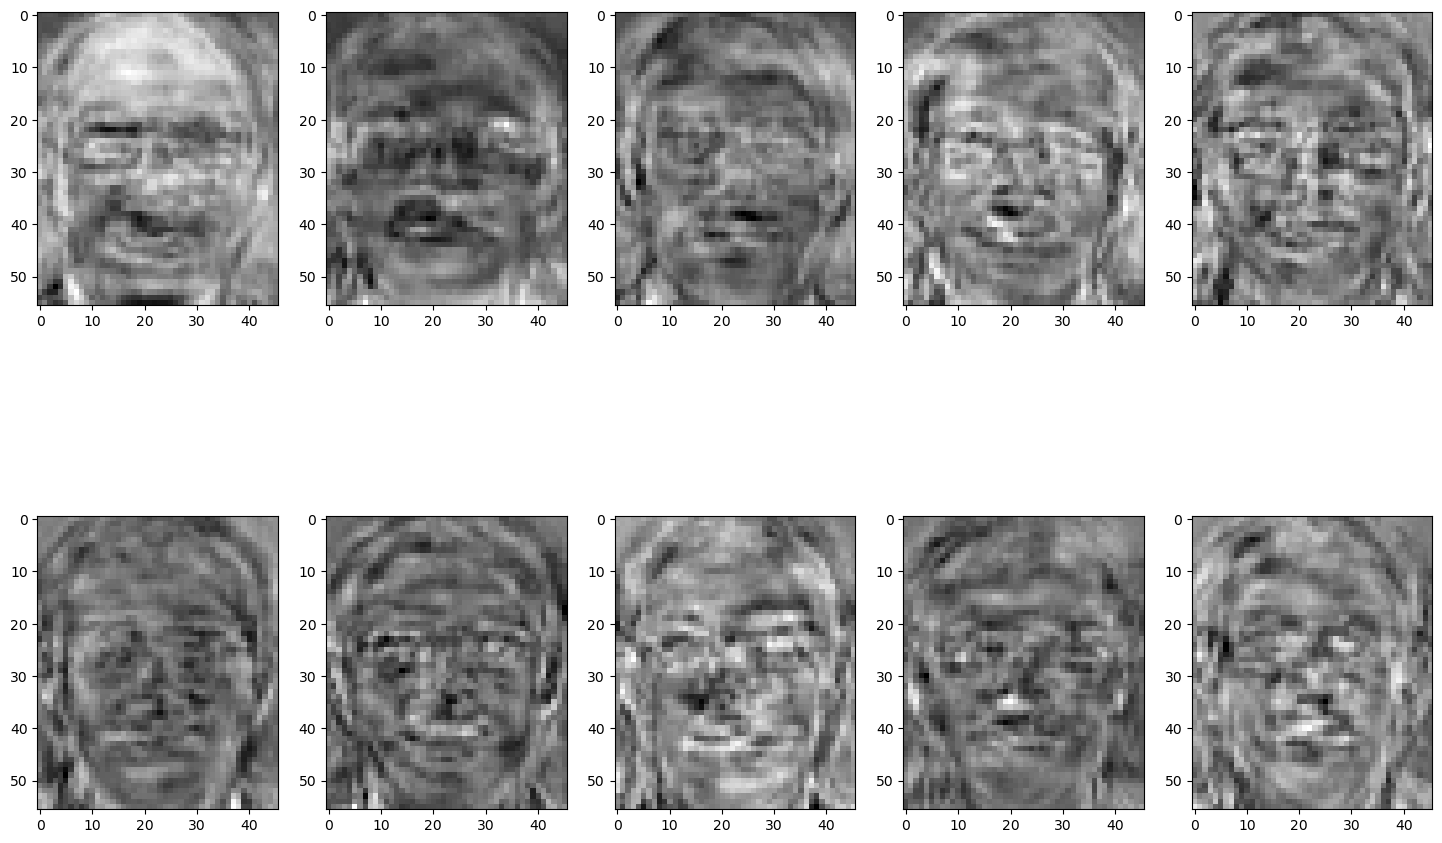

In [44]:
# INSERT CODE HERE
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 12))
for i in range(10):
    lda_rec_pic = np.matmul(lda_eigvecs[:, i].reshape(-1, 80), 
                            v[:, :80].T).reshape(56, 46)
    axs[i // 5, i % 5].imshow(lda_rec_pic, cmap="gray_r")
plt.show()


### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

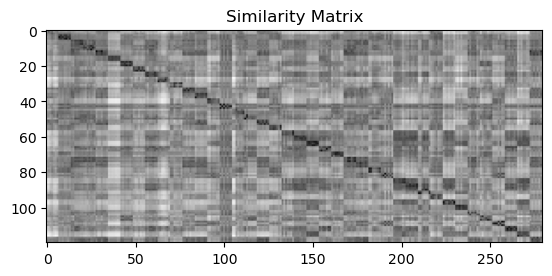

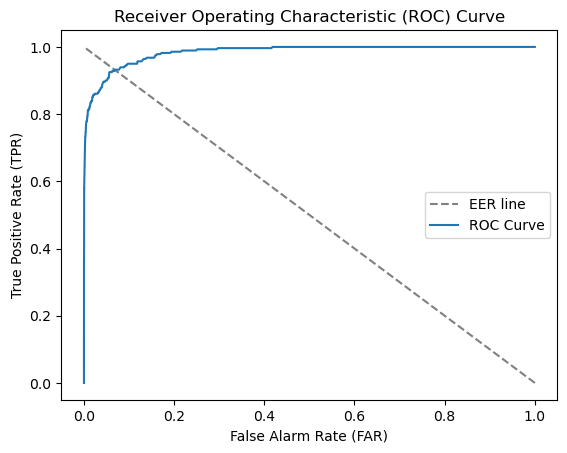

Equal Error Rate (EER): 0.9321428571428572
Recall rate at 0.1% FAR: 0.6071428571428571


In [45]:
# INSERT CODE HERE
# Project data onto the LDA subspace using the eigenvectors corresponding to the largest eigenvalues
T_fisher = np.dot(T_pca, lda_eigvecs)
D_fisher = np.dot(D_pca, lda_eigvecs)

# Similarity Matrix
fisher_similarity_matrix = generate_similarity_matrix(T_fisher, D_fisher)

# Display similarity matrix as an image
plt.imshow(fisher_similarity_matrix, cmap='gray')
plt.title('Similarity Matrix')
plt.show()

# Plot ROC curve with EER and recall rate at 0.1% FAR
eer_tpr, recall_at_far = plot_roc(fisher_similarity_matrix, eer=True, far_target=0.001)
print("Equal Error Rate (EER):", eer_tpr)
print("Recall rate at 0.1% FAR:", recall_at_far)

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

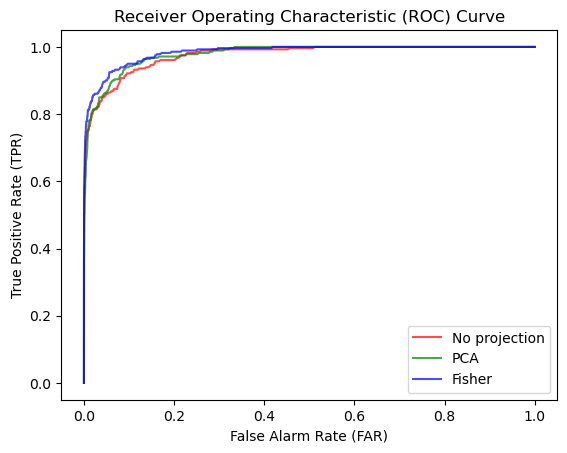

In [46]:
# INSERT CODE HERE
color = ["red", "green", "blue"]
label = ["No projection", "PCA", "Fisher"]

def plot_multiple_roc(input_mat_list):
    
    for i in range(len(input_mat_list)):
        tpr_list, far_list = calculate_roc(input_mat_list[i])
        plt.plot(far_list, tpr_list, "-", color=color[i], label=label[i], alpha=0.7)
    
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.ylabel("True Positive Rate (TPR)")
    plt.xlabel("False Alarm Rate (FAR)")
    plt.legend()
    plt.show()

similarity_matrix_list = [similarity_matrix, 
                          reduced_similarity_matrix, 
                          fisher_similarity_matrix]
plot_multiple_roc(similarity_matrix_list)

### OT5. Plot the first two LDA dimensions of the test images from different people (6 people 7 images each). Use a different color for each person. Observe the clustering of between each person. Repeat the same steps for the PCA projections. Does it come out as expected?